  # Phishing URL Detection using Machine Learning Techniques

## 1.Collecting Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings
warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\91950\major project\preprocessed_dataset\preprocessed_data.csv")

In [3]:
data.head(5)

,URL,Label
0,workingwithwalter.com/wp-admin/images/screensh...,bad
1,checkyourelectricitybill.co.za/BOA/home/confir...,bad
2,allendesign.com.au/wp-admin/css/colors/sunrise...,bad
3,3dhabbonovo.rel7.com/,bad
4,groupetogi.com/css/gerbera/?allegro.pl/czarne-...,bad


In [4]:
import nltk
import re

from nltk.tokenize import RegexpTokenizer

In [5]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [6]:
data.URL[4]

'groupetogi.com/css/gerbera/?allegro.pl/czarne-audi-a4-avant-1-9-tdi-116ps-alu16-climatron.html'

In [7]:
tokenizer.tokenize(data.URL[4]) # using the fourth row..

['groupetogi',
 'com',
 'css',
 'gerbera',
 'allegro',
 'pl',
 'czarne',
 'audi',
 'a',
 'avant',
 'tdi',
 'ps',
 'alu',
 'climatron',
 'html']

In [8]:
data['text_tokenized'] = data.URL.map(lambda t: tokenizer.tokenize(t))

In [9]:
data

,URL,Label,text_tokenized
0,workingwithwalter.com/wp-admin/images/screensh...,bad,"[workingwithwalter, com, wp, admin, images, sc..."
1,checkyourelectricitybill.co.za/BOA/home/confir...,bad,"[checkyourelectricitybill, co, za, BOA, home, ..."
2,allendesign.com.au/wp-admin/css/colors/sunrise...,bad,"[allendesign, com, au, wp, admin, css, colors,..."
3,3dhabbonovo.rel7.com/,bad,"[dhabbonovo, rel, com]"
4,groupetogi.com/css/gerbera/?allegro.pl/czarne-...,bad,"[groupetogi, com, css, gerbera, allegro, pl, c..."
...,...,...,...
11995,sportslogos.net/team.php?id=2717,good,"[sportslogos, net, team, php, id]"
11996,quranteacherathome.com/laminar-debbe-dunning-p...,good,"[quranteacherathome, com, laminar, debbe, dunn..."
11997,entrepreneur.com/franchises/eastofchicagopizza...,good,"[entrepreneur, com, franchises, eastofchicagop..."
11998,christopherwesthoff.com/projects/pm_project/in...,good,"[christopherwesthoff, com, projects, pm, proje..."


In [10]:
# Stemming To find the rootwords:
from nltk.stem.snowball import SnowballStemmer

In [11]:
stemmer = SnowballStemmer("english")

In [12]:
data['text_stemmed'] = data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])

In [13]:
data['text_sent'] = data['text_stemmed'].map(lambda l: ' '.join(l))

In [14]:
data

,URL,Label,text_tokenized,text_stemmed,text_sent
0,workingwithwalter.com/wp-admin/images/screensh...,bad,"[workingwithwalter, com, wp, admin, images, sc...","[workingwithwalt, com, wp, admin, imag, screen...",workingwithwalt com wp admin imag screenshot p...
1,checkyourelectricitybill.co.za/BOA/home/confir...,bad,"[checkyourelectricitybill, co, za, BOA, home, ...","[checkyourelectricitybil, co, za, boa, home, c...",checkyourelectricitybil co za boa home confirm...
2,allendesign.com.au/wp-admin/css/colors/sunrise...,bad,"[allendesign, com, au, wp, admin, css, colors,...","[allendesign, com, au, wp, admin, css, color, ...",allendesign com au wp admin css color sunris n...
3,3dhabbonovo.rel7.com/,bad,"[dhabbonovo, rel, com]","[dhabbonovo, rel, com]",dhabbonovo rel com
4,groupetogi.com/css/gerbera/?allegro.pl/czarne-...,bad,"[groupetogi, com, css, gerbera, allegro, pl, c...","[groupetogi, com, css, gerbera, allegro, pl, c...",groupetogi com css gerbera allegro pl czarn au...
...,...,...,...,...,...
11995,sportslogos.net/team.php?id=2717,good,"[sportslogos, net, team, php, id]","[sportslogo, net, team, php, id]",sportslogo net team php id
11996,quranteacherathome.com/laminar-debbe-dunning-p...,good,"[quranteacherathome, com, laminar, debbe, dunn...","[quranteacherathom, com, laminar, debb, dun, p...",quranteacherathom com laminar debb dun photo
11997,entrepreneur.com/franchises/eastofchicagopizza...,good,"[entrepreneur, com, franchises, eastofchicagop...","[entrepreneur, com, franchis, eastofchicagopiz...",entrepreneur com franchis eastofchicagopizzaco...
11998,christopherwesthoff.com/projects/pm_project/in...,good,"[christopherwesthoff, com, projects, pm, proje...","[christopherwesthoff, com, project, pm, projec...",christopherwesthoff com project pm project ind...


In [15]:
data.shape

(12000, 5)

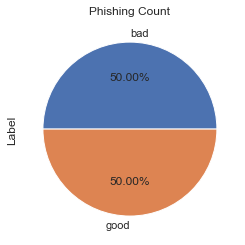

In [16]:
data['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## 2.Feature Extraction

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv = CountVectorizer()

In [19]:
"""
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()
"""

'\n# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed\ndata = data.sample(frac=1).reset_index(drop=True)\ndata.head()\n'

In [20]:
feature = cv.fit_transform(data.text_sent)

In [21]:
feature

<12000x25249 sparse matrix of type '<class 'numpy.int64'>'
	with 98422 stored elements in Compressed Sparse Row format>

In [22]:
feature = feature[:].toarray()

In [23]:
feature

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
#df=pd.DataFrame(data=feature,columns=cv.get_feature_names())

In [25]:
#df

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data.text_sent)
vectors.shape

(12000, 25249)

In [27]:
vectors = vectors[:].toarray()

In [28]:
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
data["Label"] = data["Label"].map({"bad":1,"good":0})

In [30]:
F= cv.get_feature_names()
F

['aa',
 'aaa',
 'aaaaa',
 'aaae',
 'aaanimalcontrol',
 'aab',
 'aabad',
 'aabg',
 'aac',
 'aacb',
 'aacilusbrasil',
 'aad',
 'aaddcb',
 'aadob',
 'aadqpgah',
 'aae',
 'aaef',
 'aaexpert',
 'aaf',
 'aafab',
 'aaff',
 'aag',
 'aagjqkughhl',
 'aago',
 'aagp',
 'aah',
 'aahpuc',
 'aainecg',
 'aainvestig',
 'aaius',
 'aaizhfw',
 'aal',
 'aaldo',
 'aalryz',
 'aalyfrj',
 'aam',
 'aamcmxg',
 'aameh',
 'aan',
 'aandgtrad',
 'aaocwrl',
 'aap',
 'aapf',
 'aar',
 'aardvark',
 'aaron',
 'aaronacom',
 'aarondf',
 'aaronmaxdesign',
 'aasssgh',
 'aav',
 'aaw',
 'aawd',
 'aawow',
 'aawwoev',
 'aawz',
 'aazv',
 'ab',
 'aba',
 'abaf',
 'abb',
 'abba',
 'abbey',
 'abbott',
 'abc',
 'abccbraganca',
 'abcd',
 'abceb',
 'abcf',
 'abcnew',
 'abcsahara',
 'abd',
 'abdc',
 'abdox',
 'abdulnajib',
 'abe',
 'abebrifrrkh',
 'abeobatkuat',
 'abf',
 'abfbfdeb',
 'abfd',
 'abh',
 'abhinesh',
 'abhishek',
 'abiblevers',
 'abid',
 'abil',
 'abitibi',
 'abkj',
 'abkqa',
 'abl',
 'abmp',
 'abn',
 'abnamro',
 'abnet',
 'a

In [31]:
X=feature
#X=vectors

In [32]:
print(X.shape)
print(data.shape)

(12000, 25249)
(12000, 5)


In [33]:
Y=data["Label"]

In [34]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: Label, Length: 12000, dtype: int64

## 3.Splitting the Data

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [37]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
Y_train

9182     0
11091    0
6428     0
288      1
2626     1
        ..
11964    0
5191     1
5390     1
860      1
7270     0
Name: Label, Length: 9600, dtype: int64

In [39]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
Y_test

1935     1
6494     0
1720     1
9120     0
360      1
        ..
1195     1
11877    0
5421     1
3855     1
4414     1
Name: Label, Length: 2400, dtype: int64

In [41]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(9600, 25249)
(2400, 25249)
(9600,)
(2400,)


## 4.Model Building

## 4.1 Random Forest

### 4.1.1 Model Building


In [42]:
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
RF=RandomForestClassifier(n_estimators=250)
RF.fit(X_train,Y_train)
RF.score(X_train,Y_train)

0.9998958333333333

In [45]:
print("RF-TEST SCORE:",RF.score(X_test,Y_test))

RF-TEST SCORE: 0.9170833333333334


In [46]:
y1_RF_pred=RF.predict(X_train)
y_RF_pred=RF.predict(X_test)

In [47]:
y_RF_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

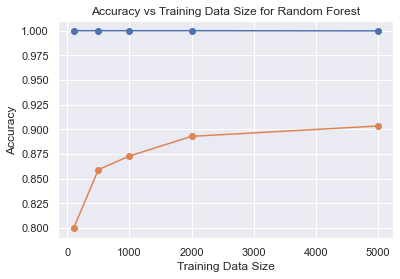

In [48]:
# Define the range of training data sizes to test
training_data_sizes_lr = [100, 500, 1000, 2000, 5000]
training_accuracy = []

# Initialize a list to store the calculated accuracies
accuracy_lr = []

# Loop through the training data sizes
for size in training_data_sizes_lr:
    # Split the data into training and test sets
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, train_size=size, random_state=42)
    
    # Train a Logistic Regression model
    clf =RandomForestClassifier(n_estimators=250)

    clf.fit(X_train1, y_train1)
    training_accuracy.append(clf.score(X_train1, y_train1))
    
    # Predict on the test set
    y_pred = clf.predict(X_test1)
    
    # Calculate accuracy using X_test and y_test, and append to the accuracy list
    accuracy = accuracy_score( y_test1,y_pred)
    accuracy_lr.append(accuracy)

# Create plot for Logistic Regression
plt.plot(training_data_sizes_lr, training_accuracy , marker='o')  # plot data points with markers

plt.plot(training_data_sizes_lr, accuracy_lr, marker='o')  # plot data points with markers
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Training Data Size for Random Forest')
plt.grid(True)
plt.show()


### 4.1.2 Confusion Matrix

<AxesSubplot:title={'center':'Random Forest Confusion Matrix'}>

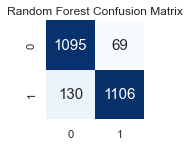

In [49]:
from sklearn.metrics import confusion_matrix
cm_rf_count = confusion_matrix(Y_test,y_RF_pred)
plt.subplot(2,3,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf_count,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 15})


### 4.1.3 Calculating Metrics

In [50]:
tp=cm_rf_count[0][0]
tn=cm_rf_count[1][1]
fp=cm_rf_count[1][0]
fn=cm_rf_count[0][1]
accuracy=(tp+tn)/(tp+tn+fp+fn)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=(2*precision*recall)/(precision+recall)
print("TESTING ACCURACY   :",accuracy)
print("TESTING PRECISION  :",precision)
print("TESTING RECALL     :",recall)
print("TESTING F1 SCORE   :",f1_score)

TESTING ACCURACY   : 0.9170833333333334
TESTING PRECISION  : 0.8938775510204081
TESTING RECALL     : 0.9407216494845361
TESTING F1 SCORE   : 0.9167015487651737


In [51]:
print("RandomForest  : Accuracy on training Data: {}".format(metrics.accuracy_score(Y_train,y1_RF_pred)))
print("RandomForest  : Accuracy on test Data: {:}".format(metrics.accuracy_score(Y_test,y_RF_pred)))
print()
print("RandomForest  : precision on training Data: {}".format(metrics.precision_score(Y_train,y1_RF_pred)))
print("RandomForest  : precision on test Data: {}".format(metrics.precision_score(Y_test,y_RF_pred)))
print()
print("RandomForest  : Recall on training Data: {}".format(metrics.recall_score(Y_train,y1_RF_pred)))
print("RandomForest  : Recall on test Data: {}".format(metrics.recall_score(Y_test,y_RF_pred)))
print()
print("RandomForest  : f1_score on training Data: {}".format(metrics.f1_score(Y_train,y1_RF_pred)))
print("RandomForest  : f1_score on test Data: {}".format(metrics.f1_score(Y_test,y_RF_pred)))

RandomForest  : Accuracy on training Data: 0.9998958333333333
RandomForest  : Accuracy on test Data: 0.9170833333333334

RandomForest  : precision on training Data: 0.9997901364113326
RandomForest  : precision on test Data: 0.9412765957446808

RandomForest  : Recall on training Data: 1.0
RandomForest  : Recall on test Data: 0.8948220064724919

RandomForest  : f1_score on training Data: 0.9998950571938293
RandomForest  : f1_score on test Data: 0.91746163417669


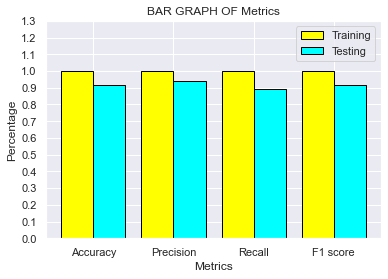

In [52]:
Yresult=[metrics.accuracy_score(Y_train,y1_RF_pred),metrics.precision_score(Y_train,y1_RF_pred),
         metrics.recall_score(Y_train,y1_RF_pred),
         metrics.f1_score(Y_train,y1_RF_pred),]
zresult=[metrics.accuracy_score(Y_test,y_RF_pred),metrics.precision_score(Y_test,y_RF_pred),
         metrics.recall_score(Y_test,y_RF_pred),
         metrics.f1_score(Y_test,y_RF_pred),]
a=["Accuracy","Precision","Recall","F1 score"]
X_axis=np.arange(len(a))
plt.bar(X_axis -0.2,Yresult,0.4,label="Training",color="yellow",edgecolor="black")
plt.bar(X_axis +0.2,zresult,0.4,label="Testing",color="cyan",edgecolor="black")
plt.xticks(X_axis,a)
plt.yticks(np.arange(0,1.5,0.1))
plt.xlabel("Metrics")
plt.ylabel("Percentage")
plt.title("BAR GRAPH OF Metrics")
plt.legend()
plt.ylim(0,1.3)
plt.show()

## 4.2 Logistic Regression 

### 4.2.1 Model Building

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
LR=LogisticRegression()

In [55]:
LR.fit(X_train,Y_train)
LR.score(X_train,Y_train)

0.9796875

In [56]:
print("LR-TEST SCORE:",LR.score(X_test,Y_test))

LR-TEST SCORE: 0.91875


In [57]:
y1_LR_pred=LR.predict(X_train)
y_LR_pred=LR.predict(X_test)

In [58]:
"""
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    LR=LogisticRegression()

    LR.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy.append(LR.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy.append(LR.score(X_test, Y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy",color="green")
plt.plot(depth, test_accuracy, label="test accuracy",color="red")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();
"""

'\ntraining_accuracy = []\ntest_accuracy = []\n# try max_depth from 1 to 20\ndepth = range(1,20)\nfor n in depth:\n    LR=LogisticRegression()\n\n    LR.fit(X_train, Y_train)\n    # record training set accuracy\n    training_accuracy.append(LR.score(X_train, Y_train))\n    # record generalization accuracy\n    test_accuracy.append(LR.score(X_test, Y_test))\n    \n\n#plotting the training & testing accuracy for n_estimators from 1 to 20\nplt.plot(depth, training_accuracy, label="training accuracy",color="green")\nplt.plot(depth, test_accuracy, label="test accuracy",color="red")\nplt.ylabel("Accuracy")  \nplt.xlabel("n_neighbors")\nplt.legend();\n'

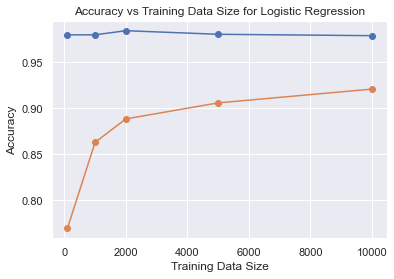

In [59]:
# Define the range of training data sizes to test
training_data_sizes_lr = [100,1000, 2000, 5000,10000]
training_accuracy = []

# Initialize a list to store the calculated accuracies
accuracy_lr = []

# Loop through the training data sizes
for size in training_data_sizes_lr:
    # Split the data into training and test sets
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, train_size=size, random_state=42)
    
    # Train a Logistic Regression model
    clf = LogisticRegression(random_state=42)
    clf.fit(X_train1, y_train1)
    training_accuracy.append(clf.score(X_train1, y_train1))
    
    # Predict on the test set
    y_pred = clf.predict(X_test1)
    
    # Calculate accuracy using X_test and y_test, and append to the accuracy list
    accuracy = accuracy_score( y_test1,y_pred)
    accuracy_lr.append(accuracy)

# Create plot for Logistic Regression
plt.plot(training_data_sizes_lr, training_accuracy , marker='o')  # plot data points with markers

plt.plot(training_data_sizes_lr, accuracy_lr, marker='o')  # plot data points with markers
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Training Data Size for Logistic Regression')
plt.grid(True)
plt.show()


### 4.2.2 Confusion Matrix

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}>

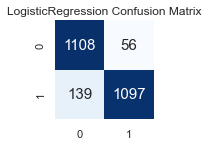

In [60]:
from sklearn.metrics import confusion_matrix
cm_LR_count = confusion_matrix(Y_test,y_LR_pred)
plt.subplot(2,3,3)
plt.title("LogisticRegression Confusion Matrix")
sns.heatmap(cm_LR_count,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 15})


### 4.2.3 Calculating Metrics

In [61]:
tp=cm_LR_count[0][0]
tn=cm_LR_count[1][1]
fp=cm_LR_count[1][0]
fn=cm_LR_count[0][1]
accuracy=(tp+tn)/(tp+tn+fp+fn)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=(2*precision*recall)/(precision+recall)
print("TESTING ACCURACY   :",accuracy)
print("TESTING PRECISION  :",precision)
print("TESTING RECALL     :",recall)
print("TESTING F1 SCORE   :",f1_score)

TESTING ACCURACY   : 0.91875
TESTING PRECISION  : 0.888532477947073
TESTING RECALL     : 0.9518900343642611
TESTING F1 SCORE   : 0.9191206968063045


In [62]:
print("Logistic Regression : Accuracy on training Data: {}".format(metrics.accuracy_score(Y_train,y1_LR_pred)))
print("Logistic Regression : Accuracy on test Data: {:}".format(metrics.accuracy_score(Y_test,y_LR_pred)))
print()
print("Logistic Regression : precision on training Data: {}".format(metrics.precision_score(Y_train,y1_LR_pred)))
print("Logistic Regression : precision on test Data: {}".format(metrics.precision_score(Y_test,y_LR_pred)))
print()
print("Logistic Regression : Recall on training Data: {}".format(metrics.recall_score(Y_train,y1_LR_pred)))
print("Logistic Regression : Recall on test Data: {}".format(metrics.recall_score(Y_test,y_LR_pred)))
print()
print("Logistic Regression : f1_score on training Data: {}".format(metrics.f1_score(Y_train,y1_LR_pred)))
print("Logistic Regression : f1_score on test Data: {}".format(metrics.f1_score(Y_test,y_LR_pred)))

Logistic Regression : Accuracy on training Data: 0.9796875
Logistic Regression : Accuracy on test Data: 0.91875

Logistic Regression : precision on training Data: 0.9937324400259347
Logistic Regression : precision on test Data: 0.9514310494362532

Logistic Regression : Recall on training Data: 0.9651553316540722
Logistic Regression : Recall on test Data: 0.8875404530744336

Logistic Regression : f1_score on training Data: 0.9792354381854969
Logistic Regression : f1_score on test Data: 0.918375889493512


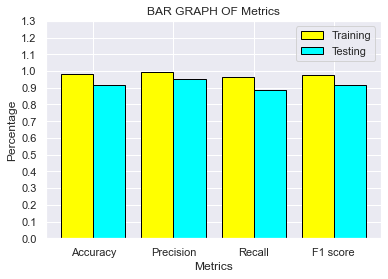

In [63]:
Yresult=[metrics.accuracy_score(Y_train,y1_LR_pred),metrics.precision_score(Y_train,y1_LR_pred),
         metrics.recall_score(Y_train,y1_LR_pred),
         metrics.f1_score(Y_train,y1_LR_pred),]
zresult=[metrics.accuracy_score(Y_test,y_LR_pred),metrics.precision_score(Y_test,y_LR_pred),
         metrics.recall_score(Y_test,y_LR_pred),
         metrics.f1_score(Y_test,y_LR_pred),]
a=["Accuracy","Precision","Recall","F1 score"]
X_axis=np.arange(len(a))
plt.bar(X_axis -0.2,Yresult,0.4,label="Training",color="yellow",edgecolor="black")
plt.bar(X_axis +0.2,zresult,0.4,label="Testing",color="cyan",edgecolor="black")
plt.xticks(X_axis,a)
plt.yticks(np.arange(0,1.5,0.1))
plt.xlabel("Metrics")
plt.ylabel("Percentage")
plt.title("BAR GRAPH OF Metrics")
plt.legend()
plt.ylim(0,1.3)
plt.show()

## 4.3 Naive Bayes 

### 4.3.1 Model Building

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
NB=GaussianNB()

In [66]:
NB.fit(X_train,Y_train)
NB.score(X_train,Y_train)

0.995625

In [67]:
print("NB-TEST SCORE:",NB.score(X_test,Y_test))

NB-TEST SCORE: 0.8629166666666667


In [68]:
y1_NB_pred=NB.predict(X_train)
y_NB_pred=NB.predict(X_test)

In [69]:
"""
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    NB= GaussianNB() 

    NB.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy.append(NB.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy.append(NB.score(X_test, Y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy",color="green")
plt.plot(depth, test_accuracy, label="test accuracy",color="red")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();
"""

'\ntraining_accuracy = []\ntest_accuracy = []\n# try max_depth from 1 to 20\ndepth = range(1,20)\nfor n in depth:\n    NB= GaussianNB() \n\n    NB.fit(X_train, Y_train)\n    # record training set accuracy\n    training_accuracy.append(NB.score(X_train, Y_train))\n    # record generalization accuracy\n    test_accuracy.append(NB.score(X_test, Y_test))\n    \n\n#plotting the training & testing accuracy for n_estimators from 1 to 20\nplt.plot(depth, training_accuracy, label="training accuracy",color="green")\nplt.plot(depth, test_accuracy, label="test accuracy",color="red")\nplt.ylabel("Accuracy")  \nplt.xlabel("n_neighbors")\nplt.legend();\n'

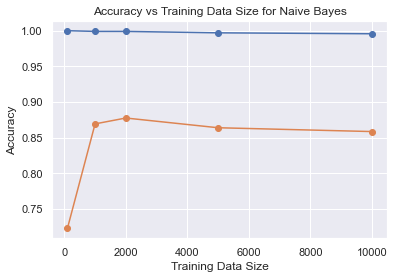

In [70]:
# Define the range of training data sizes to test
training_data_sizes_lr = [100, 1000, 2000, 5000,10000]
training_accuracy = []

# Initialize a list to store the calculated accuracies
accuracy_lr = []

# Loop through the training data sizes
for size in training_data_sizes_lr:
    # Split the data into training and test sets
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, train_size=size, random_state=42)
    
    # Train a Logistic Regression model
    clf = GaussianNB()
    clf.fit(X_train1, y_train1)
    training_accuracy.append(clf.score(X_train1, y_train1))
    
    # Predict on the test set
    y_pred = clf.predict(X_test1)
    
    # Calculate accuracy using X_test and y_test, and append to the accuracy list
    accuracy = accuracy_score( y_test1,y_pred)
    accuracy_lr.append(accuracy)

# Create plot for Logistic Regression
plt.plot(training_data_sizes_lr, training_accuracy , marker='o')  # plot data points with markers

plt.plot(training_data_sizes_lr, accuracy_lr, marker='o')  # plot data points with markers
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Training Data Size for Naive Bayes')
plt.grid(True)
plt.show()


### 4.3.2 Confusion Matrix

<AxesSubplot:title={'center':'NaiveBayes Confusion Matrix'}>

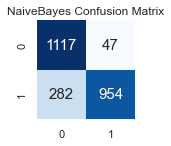

In [71]:
from sklearn.metrics import confusion_matrix
cm_NB_count = confusion_matrix(Y_test,y_NB_pred)
plt.subplot(2,3,3)
plt.title("NaiveBayes Confusion Matrix")
sns.heatmap(cm_NB_count,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 15})

### 4.3.3 Calculating Metrics

In [72]:
tp=cm_NB_count[0][0]
tn=cm_NB_count[1][1]
fp=cm_NB_count[1][0]
fn=cm_NB_count[0][1]
accuracy=(tp+tn)/(tp+tn+fp+fn)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=(2*precision*recall)/(precision+recall)
print("TESTING ACCURACY   :",accuracy)
print("TESTING PRECISION  :",precision)
print("TESTING RECALL     :",recall)
print("TESTING F1 SCORE   :",f1_score)

TESTING ACCURACY   : 0.8629166666666667
TESTING PRECISION  : 0.7984274481772695
TESTING RECALL     : 0.9596219931271478
TESTING F1 SCORE   : 0.8716348029652752


In [73]:
print("NaiveBayes  : Accuracy on training Data: {}".format(metrics.accuracy_score(Y_train,y1_NB_pred)))
print("NaiveBayes  : Accuracy on test Data: {:}".format(metrics.accuracy_score(Y_test,y_NB_pred)))
print()
print("NaiveBayes  : precision on training Data: {}".format(metrics.precision_score(Y_train,y1_NB_pred)))
print("NaiveBayes  : precision on test Data: {}".format(metrics.precision_score(Y_test,y_NB_pred)))
print()
print("NaiveBayes  : Recall on training Data: {}".format(metrics.recall_score(Y_train,y1_NB_pred)))
print("NaiveBayes  : Recall on test Data: {}".format(metrics.recall_score(Y_test,y_NB_pred)))
print()
print("NaiveBayes  : f1_score on training Data: {}".format(metrics.f1_score(Y_train,y1_NB_pred)))
print("NaiveBayes  : f1_score on test Data: {}".format(metrics.f1_score(Y_test,y_NB_pred)))

NaiveBayes  : Accuracy on training Data: 0.995625
NaiveBayes  : Accuracy on test Data: 0.8629166666666667

NaiveBayes  : precision on training Data: 1.0
NaiveBayes  : precision on test Data: 0.9530469530469531

NaiveBayes  : Recall on training Data: 0.9911838790931989
NaiveBayes  : Recall on test Data: 0.7718446601941747

NaiveBayes  : f1_score on training Data: 0.995572422517394
NaiveBayes  : f1_score on test Data: 0.8529280286097453


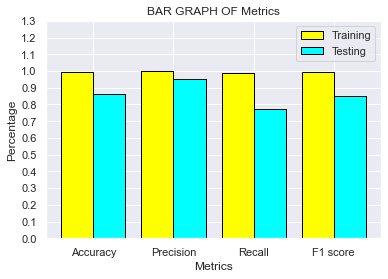

In [74]:
Yresult=[metrics.accuracy_score(Y_train,y1_NB_pred),metrics.precision_score(Y_train,y1_NB_pred),
         metrics.recall_score(Y_train,y1_NB_pred),
         metrics.f1_score(Y_train,y1_NB_pred),]
zresult=[metrics.accuracy_score(Y_test,y_NB_pred),metrics.precision_score(Y_test,y_NB_pred),
         metrics.recall_score(Y_test,y_NB_pred),
         metrics.f1_score(Y_test,y_NB_pred),]
a=["Accuracy","Precision","Recall","F1 score"]
X_axis=np.arange(len(a))
plt.bar(X_axis -0.2,Yresult,0.4,label="Training",color="yellow",edgecolor="black")
plt.bar(X_axis +0.2,zresult,0.4,label="Testing",color="cyan",edgecolor="black")
plt.xticks(X_axis,a)
plt.yticks(np.arange(0,1.5,0.1))
plt.xlabel("Metrics")
plt.ylabel("Percentage")
plt.title("BAR GRAPH OF Metrics")
plt.legend()
plt.ylim(0,1.3)
plt.show()

### 4.4  K-Nearest Neighbours

### 4.4.1 Model Building

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,Y_train)
KNN.score(X_train,Y_train)

0.8798958333333333

In [77]:
print("KNN-TEST SCORE:",KNN.score(X_test,Y_test))

KNN-TEST SCORE: 0.8354166666666667


In [78]:
y1_KNN_pred=KNN.predict(X_train)
y_KNN_pred=KNN.predict(X_test)

In [79]:
"""
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, Y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, Y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, Y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy",color="green")
plt.plot(depth, test_accuracy, label="test accuracy",color="red")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();
"""

'\ntraining_accuracy = []\ntest_accuracy = []\n# try max_depth from 1 to 20\ndepth = range(1,20)\nfor n in depth:\n    knn = KNeighborsClassifier(n_neighbors=n)\n\n    knn.fit(X_train, Y_train)\n    # record training set accuracy\n    training_accuracy.append(knn.score(X_train, Y_train))\n    # record generalization accuracy\n    test_accuracy.append(knn.score(X_test, Y_test))\n    \n\n#plotting the training & testing accuracy for n_estimators from 1 to 20\nplt.plot(depth, training_accuracy, label="training accuracy",color="green")\nplt.plot(depth, test_accuracy, label="test accuracy",color="red")\nplt.ylabel("Accuracy")  \nplt.xlabel("n_neighbors")\nplt.legend();\n'

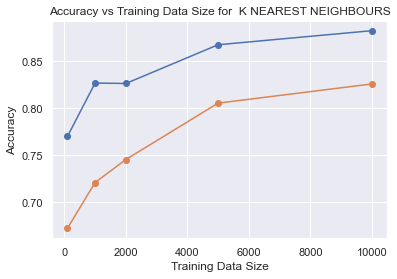

In [80]:
# Define the range of training data sizes to test
training_data_sizes_lr = [100,1000, 2000, 5000,10000]
training_accuracy = []

# Initialize a list to store the calculated accuracies
accuracy_lr = []

# Loop through the training data sizes
for size in training_data_sizes_lr:
    # Split the data into training and test sets
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, train_size=size, random_state=42)
    
    # Train a Logistic Regression model
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train1, y_train1)
    training_accuracy.append(clf.score(X_train1, y_train1))
    
    # Predict on the test set
    y_pred = clf.predict(X_test1)
    
    # Calculate accuracy using X_test and y_test, and append to the accuracy list
    accuracy = accuracy_score( y_test1,y_pred)
    accuracy_lr.append(accuracy)

# Create plot for Logistic Regression
plt.plot(training_data_sizes_lr, training_accuracy , marker='o')  # plot data points with markers

plt.plot(training_data_sizes_lr, accuracy_lr, marker='o')  # plot data points with markers
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Training Data Size for  K NEAREST NEIGHBOURS')
plt.grid(True)
plt.show()


### 4.4.2 Confusion Matrix


<AxesSubplot:title={'center':'K-NearestNeighbours Confusion Matrix'}>

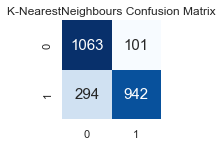

In [81]:
from sklearn.metrics import confusion_matrix
cm_KNN_count = confusion_matrix(Y_test,y_KNN_pred)
plt.subplot(2,3,3)
plt.title("K-NearestNeighbours Confusion Matrix")
sns.heatmap(cm_KNN_count,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 15})

### 4.4.3 Calculating Metrics

In [82]:
tp=cm_KNN_count[0][0]
tn=cm_KNN_count[1][1]
fp=cm_KNN_count[1][0]
fn=cm_KNN_count[0][1]
accuracy=(tp+tn)/(tp+tn+fp+fn)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=(2*precision*recall)/(precision+recall)
print("TESTING ACCURACY   :",accuracy)
print("TESTING PRECISION  :",precision)
print("TESTING RECALL     :",recall)
print("TESTING F1 SCORE   :",f1_score)

TESTING ACCURACY   : 0.8354166666666667
TESTING PRECISION  : 0.7833456153279292
TESTING RECALL     : 0.9132302405498282
TESTING F1 SCORE   : 0.843316144387148


In [83]:
print("K-NearestNeighbours  : Accuracy on training Data: {}".format(metrics.accuracy_score(Y_train,y1_KNN_pred)))
print("K-NearestNeighbours  : Accuracy on test Data: {:}".format(metrics.accuracy_score(Y_test,y_KNN_pred)))
print()
print("K-NearestNeighbours  : precision on training Data: {}".format(metrics.precision_score(Y_train,y1_KNN_pred)))
print("K-NearestNeighbours  : precision on test Data: {}".format(metrics.precision_score(Y_test,y_KNN_pred)))
print()
print("K-NearestNeighbours  : Recall on training Data: {}".format(metrics.recall_score(Y_train,y1_KNN_pred)))
print("K-NearestNeighbours  : Recall on test Data: {}".format(metrics.recall_score(Y_test,y_KNN_pred)))
print()
print("K-NearestNeighbours  : f1_score on training Data: {}".format(metrics.f1_score(Y_train,y1_KNN_pred)))
print("K-NearestNeighbours  : f1_score on test Data: {}".format(metrics.f1_score(Y_test,y_KNN_pred)))

K-NearestNeighbours  : Accuracy on training Data: 0.8798958333333333
K-NearestNeighbours  : Accuracy on test Data: 0.8354166666666667

K-NearestNeighbours  : precision on training Data: 0.927539663746152
K-NearestNeighbours  : precision on test Data: 0.9031639501438159

K-NearestNeighbours  : Recall on training Data: 0.822208228379513
K-NearestNeighbours  : Recall on test Data: 0.7621359223300971

K-NearestNeighbours  : f1_score on training Data: 0.8717035718259709
K-NearestNeighbours  : f1_score on test Data: 0.8266783677051338


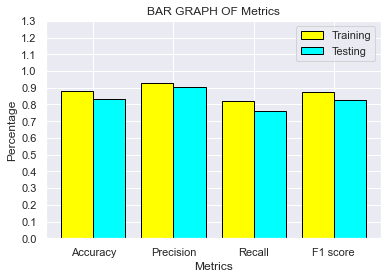

In [84]:
Yresult=[metrics.accuracy_score(Y_train,y1_KNN_pred),metrics.precision_score(Y_train,y1_KNN_pred),
         metrics.recall_score(Y_train,y1_KNN_pred),
         metrics.f1_score(Y_train,y1_KNN_pred),]
zresult=[metrics.accuracy_score(Y_test,y_KNN_pred),metrics.precision_score(Y_test,y_KNN_pred),
         metrics.recall_score(Y_test,y_KNN_pred),
         metrics.f1_score(Y_test,y_KNN_pred),]
a=["Accuracy","Precision","Recall","F1 score"]
X_axis=np.arange(len(a))
plt.bar(X_axis -0.2,Yresult,0.4,label="Training",color="yellow",edgecolor="black")
plt.bar(X_axis +0.2,zresult,0.4,label="Testing",color="cyan",edgecolor="black")
plt.xticks(X_axis,a)
plt.yticks(np.arange(0,1.5,0.1))
plt.xlabel("Metrics")
plt.ylabel("Percentage")
plt.title("BAR GRAPH OF Metrics")
plt.legend()
plt.ylim(0,1.3)
plt.show()

# 5.Comparing Models

## 5.1 TABULAR REPRESENTATION

In [85]:
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

storeResults('Random Forest ',metrics.accuracy_score(Y_test,y_RF_pred),metrics.f1_score(Y_test,y_RF_pred),
             metrics.recall_score(Y_test,y_RF_pred),metrics.precision_score(Y_test,y_RF_pred))
storeResults('Logistic Regression ',metrics.accuracy_score(Y_test,y_LR_pred),metrics.f1_score(Y_test,y_LR_pred),
             metrics.recall_score(Y_test,y_LR_pred),metrics.precision_score(Y_test,y_LR_pred))
storeResults('Naive Bayes ',metrics.accuracy_score(Y_test,y_NB_pred),metrics.f1_score(Y_test,y_NB_pred),
             metrics.recall_score(Y_test,y_NB_pred),metrics.precision_score(Y_test,y_NB_pred))
""""
storeResults('Gradient boost Classifier ',metrics.accuracy_score(Y_test,y_XgB_pred),metrics.f1_score(Y_test,y_XgB_pred),
             metrics.recall_score(Y_test,y_XgB_pred),metrics.precision_score(Y_test,y_XgB_pred))
"""
storeResults('K-Nearest Neighbours ',metrics.accuracy_score(Y_test,y_KNN_pred),metrics.f1_score(Y_test,y_KNN_pred),
             metrics.recall_score(Y_test,y_KNN_pred),metrics.precision_score(Y_test,y_KNN_pred))

print(accuracy)

[0.917, 0.919, 0.863, 0.835]


In [86]:
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'f1_score' : f1_score,
                         })

In [87]:
result


,ML Model,Accuracy,Precision,Recall,f1_score
0,Random Forest,0.917,0.941,0.895,0.917
1,Logistic Regression,0.919,0.951,0.888,0.918
2,Naive Bayes,0.863,0.953,0.772,0.853
3,K-Nearest Neighbours,0.835,0.903,0.762,0.827


In [88]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [89]:
sorted_result

,ML Model,Accuracy,Precision,Recall,f1_score
0,Logistic Regression,0.919,0.951,0.888,0.918
1,Random Forest,0.917,0.941,0.895,0.917
2,Naive Bayes,0.863,0.953,0.772,0.853
3,K-Nearest Neighbours,0.835,0.903,0.762,0.827


##  5.2 GRAPHICAL REPRESENTATION

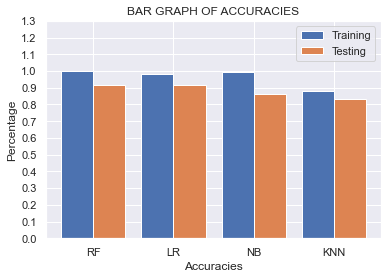

In [90]:
Yresult=[metrics.accuracy_score(Y_train,y1_RF_pred),metrics.accuracy_score(Y_train,y1_LR_pred),
         metrics.accuracy_score(Y_train,y1_NB_pred),
         metrics.accuracy_score(Y_train,y1_KNN_pred),]
zresult=accuracy
a=["RF","LR","NB","KNN"]
X_axis=np.arange(len(a))
plt.bar(X_axis -0.2,Yresult,0.4,label="Training")
plt.bar(X_axis +0.2,zresult,0.4,label="Testing")
plt.xticks(X_axis,a)
plt.yticks(np.arange(0,1.5,0.1))
plt.xlabel("Accuracies")
plt.ylabel("Percentage")
plt.title("BAR GRAPH OF ACCURACIES")
plt.legend()
plt.ylim(0,1.3)
plt.show()

In [91]:
from sklearn.pipeline import make_pipeline 

In [92]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'),LR)

In [93]:
trainX, testX, trainY, testY = train_test_split(data.URL, data.Label)

In [94]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [95]:
pipeline_ls.score(testX,testY) 

0.9183333333333333

In [96]:
import pickle

In [98]:
pickle.dump(pipeline_ls, open(r'C:\Users\91950\major project\pickel\phishing.pkl', 'wb'))
